<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Imports

In [ ]:
from os import environ
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pytest
import seaborn as sns
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

In [ ]:
environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

## Monotonic Dense Layer

### Actvation Functions

We use $\breve{\mathcal{A}}$ to denote the set of all zero-centred, monotonically increasing, convex, lower-bounded functions.

Let $\breve{\rho} \in \breve{\mathcal{A}}$. Then
\begin{align}\label{eq:activation_concave}
    \hat{\rho}(x) & = -\breve{\rho}(-x) \\
    \label{eq:activation_saturated}
    \tilde{\rho}(x) & = \begin{cases}
      \breve{\rho}(x+1)-\breve{\rho}(1) & \text{if }x < 0\\
      \hat{\rho}(x-1)+\breve{\rho}(1) & \text{otherwise}
    \end{cases} 
\end{align}
 
 In the code below, the following names are used for denotation of the above functions:
 
 - `convex_activation` denotes $\breve{\rho}$,
 
 - `concave_activation` denotes $\hat{\rho}$, and
 
 - `saturated_activation` denotes $\tilde{\rho}$. 
 

In [1]:
#| echo: false
#| output: asis
show_doc(get_activation_functions)

---

[source](https://github.com/airtai/monotonic-nn/blob/main/airt/_components/mono_dense_layer.py#L48){target="_blank" style="float:right; font-size:smaller"}

### get_activation_functions

>      get_activation_functions (activation:Union[str,Callable[[Union[tensorflow
>                                .python.types.core.Tensor,tensorflow.python.typ
>                                es.core.TensorProtocol,int,float,bool,str,bytes
>                                ,complex,tuple,list,numpy.ndarray,numpy.generic
>                                ]],Union[tensorflow.python.types.core.Tensor,te
>                                nsorflow.python.types.core.TensorProtocol,int,f
>                                loat,bool,str,bytes,complex,tuple,list,numpy.nd
>                                array,numpy.generic]],NoneType]=None)

In [2]:
#| echo: false
#| output: asis
show_doc(get_saturated_activation)

---

[source](https://github.com/airtai/monotonic-nn/blob/main/airt/_components/mono_dense_layer.py#L22){target="_blank" style="float:right; font-size:smaller"}

### get_saturated_activation

>      get_saturated_activation (convex_activation:Callable[[Union[tensorflow.py
>                                thon.types.core.Tensor,tensorflow.python.types.
>                                core.TensorProtocol,int,float,bool,str,bytes,co
>                                mplex,tuple,list,numpy.ndarray,numpy.generic]],
>                                Union[tensorflow.python.types.core.Tensor,tenso
>                                rflow.python.types.core.TensorProtocol,int,floa
>                                t,bool,str,bytes,complex,tuple,list,numpy.ndarr
>                                ay,numpy.generic]], concave_activation:Callable
>                                [[Union[tensorflow.python.types.core.Tensor,ten
>                                sorflow.python.types.core.TensorProtocol,int,fl
>                                oat,bool,str,bytes,complex,tuple,list,numpy.nda
>                                rray,numpy.generic]],Union[tensorflow.python.ty
>                                pes.core.Tensor,tensorflow.python.types.core.Te
>                                nsorProtocol,int,float,bool,str,bytes,complex,t
>                                uple,list,numpy.ndarray,numpy.generic]],
>                                a:float=1.0, c:float=1.0)

In [3]:
#| echo: false
#| output: asis
show_doc(apply_activations)

---

[source](https://github.com/airtai/monotonic-nn/blob/main/airt/_components/mono_dense_layer.py#L70){target="_blank" style="float:right; font-size:smaller"}

### apply_activations

>      apply_activations (x:Union[tensorflow.python.types.core.Tensor,tensorflow
>                         .python.types.core.TensorProtocol,int,float,bool,str,b
>                         ytes,complex,tuple,list,numpy.ndarray,numpy.generic],
>                         units:int, convex_activation:Callable[[Union[tensorflo
>                         w.python.types.core.Tensor,tensorflow.python.types.cor
>                         e.TensorProtocol,int,float,bool,str,bytes,complex,tupl
>                         e,list,numpy.ndarray,numpy.generic]],Union[tensorflow.
>                         python.types.core.Tensor,tensorflow.python.types.core.
>                         TensorProtocol,int,float,bool,str,bytes,complex,tuple,
>                         list,numpy.ndarray,numpy.generic]], concave_activation
>                         :Callable[[Union[tensorflow.python.types.core.Tensor,t
>                         ensorflow.python.types.core.TensorProtocol,int,float,b
>                         ool,str,bytes,complex,tuple,list,numpy.ndarray,numpy.g
>                         eneric]],Union[tensorflow.python.types.core.Tensor,ten
>                         sorflow.python.types.core.TensorProtocol,int,float,boo
>                         l,str,bytes,complex,tuple,list,numpy.ndarray,numpy.gen
>                         eric]], saturated_activation:Callable[[Union[tensorflo
>                         w.python.types.core.Tensor,tensorflow.python.types.cor
>                         e.TensorProtocol,int,float,bool,str,bytes,complex,tupl
>                         e,list,numpy.ndarray,numpy.generic]],Union[tensorflow.
>                         python.types.core.Tensor,tensorflow.python.types.core.
>                         TensorProtocol,int,float,bool,str,bytes,complex,tuple,
>                         list,numpy.ndarray,numpy.generic]],
>                         is_convex:bool=False, is_concave:bool=False,
>                         activation_weights:Tuple[float,float,float]=(7.0, 7.0,
>                         2.0))

In [ ]:
def plot_applied_activation(
    activation: str = "relu",
    *,
    save_pdf: bool = False,
    save_path: Union[Path, str] = "plots",
    font_size: int = 20,
    linestyle="--",
    alpha=0.7,
    linewidth=2.0,
):
    font = {"size": font_size}
    matplotlib.rc("font", **font)
    plt.rcParams["figure.figsize"] = (18, 3)

    x = np.arange(-1.5, 1.5, step=3 / 256)
    h = 3 * np.sin(2 * np.pi * x)

    (
        convex_activation,
        concave_activation,
        saturated_activation,
    ) = get_activation_functions(activation)

    y = apply_activations(
        h,
        convex_activation=convex_activation,
        concave_activation=concave_activation,
        saturated_activation=saturated_activation,
        units=x.shape[0],
        activation_weights=(1.0, 1.0, 1.0),
    )

    plot_kwargs = dict(linestyle=linestyle, alpha=alpha, linewidth=linewidth)

    plt.plot(np.arange(x.shape[0]), h, label="$h$", **plot_kwargs)
    plt.plot(np.arange(x.shape[0]), y, label=r"${\rho}(h)$", **plot_kwargs)
    title = (
        "Applying "
        + (activation.__name__ if hasattr(activation, "__name__") else activation)
        + f"-based activations to {x.shape[0]}-dimensional vector"
        + r" $h$"
    )
    plt.title(title)

    plt.legend()

    if save_pdf:
        path = Path(save_path) / (title.replace(" ", "_") + ".pdf")
        path.parent.mkdir(exist_ok=True, parents=True)
        plt.savefig(path, format="pdf")
    #         print(f"Saved figure to: {path}")

    plt.show()

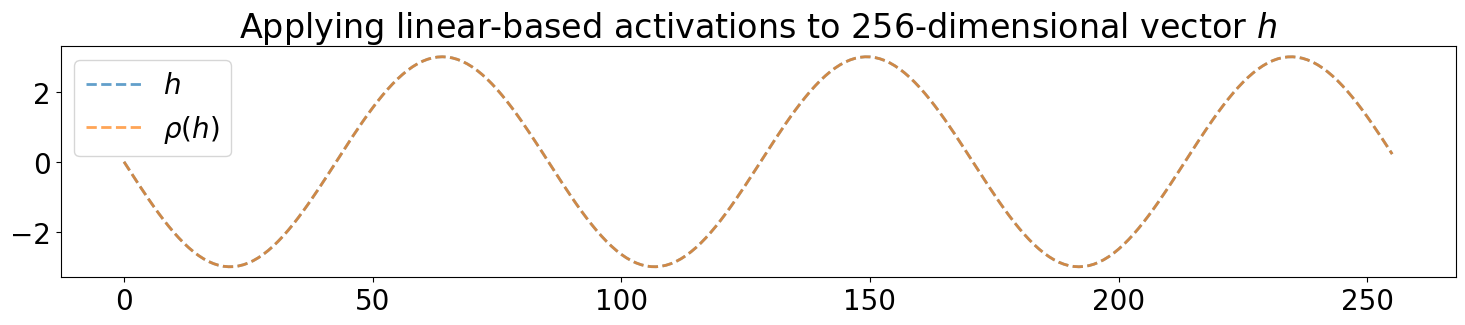

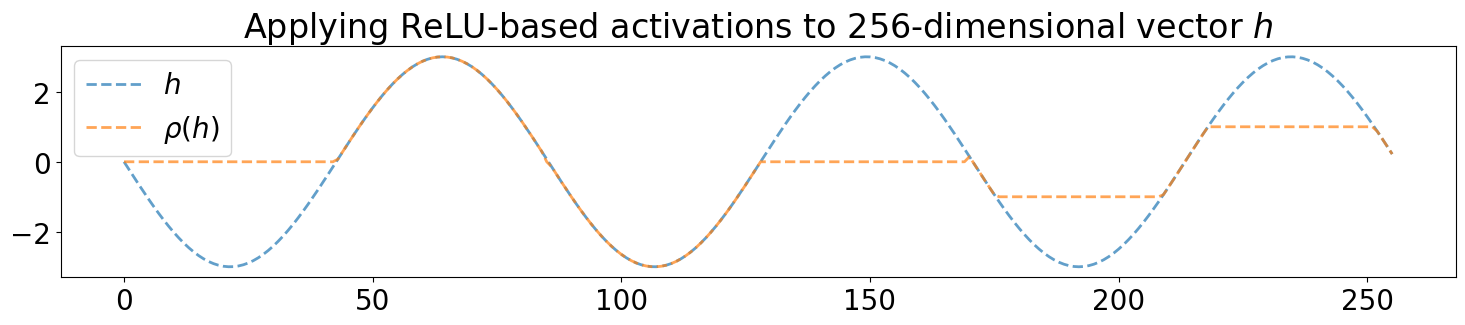

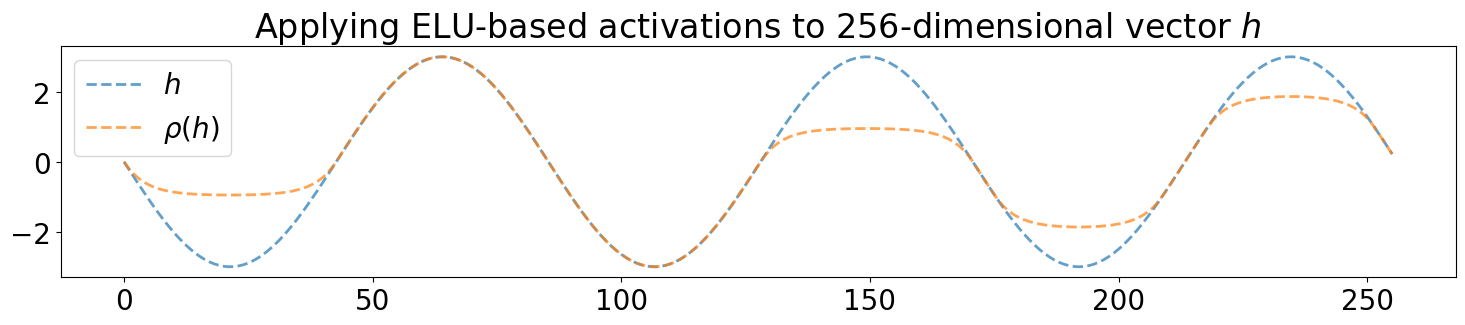

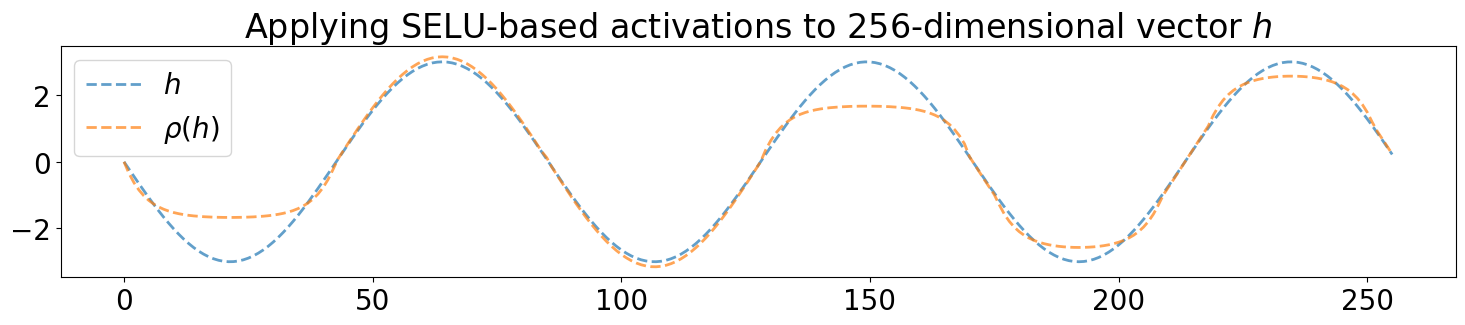

In [ ]:
for activation in ["linear", "ReLU", "ELU", "SELU"]:
    plot_applied_activation(activation, save_pdf=True)

### Monotonicity indicator

In [4]:
#| echo: false
#| output: asis
show_doc(get_monotonicity_indicator)

---

[source](https://github.com/airtai/monotonic-nn/blob/main/airt/_components/mono_dense_layer.py#L114){target="_blank" style="float:right; font-size:smaller"}

### get_monotonicity_indicator

>      get_monotonicity_indicator (monotonicity_indicator:Union[numpy.__array_li
>                                  ke._SupportsArray[numpy.dtype],numpy.__nested
>                                  _sequence._NestedSequence[numpy.__array_like.
>                                  _SupportsArray[numpy.dtype]],bool,int,float,c
>                                  omplex,str,bytes,numpy.__nested_sequence._Nes
>                                  tedSequence[Union[bool,int,float,complex,str,
>                                  bytes]]], input_shape:Tuple[int,...],
>                                  units:int)

In [ ]:
input_shape = (13, 2)
units = 3

layer = Dense(units=units)
layer.build(input_shape=input_shape)

for monotonicity_indicator in [
    1,
    [1],
    [1, 1],
    np.ones((2,)),
    np.ones((2, 1)),
    np.ones((2, 3)),
]:
    expected = np.ones((2, 3))
    actual = get_monotonicity_indicator(
        monotonicity_indicator, input_shape=(13, 2), units=3
    )

    # rank is 2
    assert len(actual.shape) == 2
    # it is broadcastable to the kernel shape of (input_shape[-1], units)
    np.testing.assert_array_equal(np.broadcast_to(actual, (2, 3)), expected)

In [ ]:
expected = [[1], [0], [-1]]
actual = get_monotonicity_indicator([1, 0, -1], input_shape=(13, 3), units=4)
np.testing.assert_array_equal(actual, expected)

In [ ]:
with pytest.raises(ValueError) as e:
    get_monotonicity_indicator([0, 1, -1], input_shape=(13, 2), units=3)
assert e.value.args == (
    "operands could not be broadcast together with remapped shapes [original->remapped]: (3,1)  and requested shape (2,3)",
)

In [5]:
#| echo: false
#| output: asis
show_doc(replace_kernel_using_monotonicity_indicator)

---

[source](https://github.com/airtai/monotonic-nn/blob/main/airt/_components/mono_dense_layer.py#L166){target="_blank" style="float:right; font-size:smaller"}

### replace_kernel_using_monotonicity_indicator

>      replace_kernel_using_monotonicity_indicator
>                                                   (layer:keras.layers.core.den
>                                                   se.Dense, monotonicity_indic
>                                                   ator:Union[tensorflow.python
>                                                   .types.core.Tensor,tensorflo
>                                                   w.python.types.core.TensorPr
>                                                   otocol,int,float,bool,str,by
>                                                   tes,complex,tuple,list,numpy
>                                                   .ndarray,numpy.generic])

In [6]:
#| echo: false
#| output: asis
show_doc(apply_monotonicity_indicator_to_kernel)

---

[source](https://github.com/airtai/monotonic-nn/blob/main/airt/_components/mono_dense_layer.py#L144){target="_blank" style="float:right; font-size:smaller"}

### apply_monotonicity_indicator_to_kernel

>      apply_monotonicity_indicator_to_kernel
>                                              (kernel:tensorflow.python.ops.var
>                                              iables.Variable, monotonicity_ind
>                                              icator:Union[numpy.__array_like._
>                                              SupportsArray[numpy.dtype],numpy.
>                                              __nested_sequence._NestedSequence
>                                              [numpy.__array_like._SupportsArra
>                                              y[numpy.dtype]],bool,int,float,co
>                                              mplex,str,bytes,numpy.__nested_se
>                                              quence._NestedSequence[Union[bool
>                                              ,int,float,complex,str,bytes]]])

In [ ]:
def display_kernel(kernel: Union[tf.Variable, np.typing.NDArray[float]]) -> None:
    cm = sns.color_palette("coolwarm_r", as_cmap=True)

    df = pd.DataFrame(kernel)

    display(
        df.style.format("{:.2f}").background_gradient(cmap=cm, vmin=-1e-8, vmax=1e-8)
    )

In [ ]:
tf.keras.utils.set_random_seed(42)

units = 18
input_len = 7

layer = tf.keras.layers.Dense(units=units)

input_shape = (input_len,)
layer.build(input_shape=input_shape)

print("Original kernel:")
display_kernel(layer.kernel)

print("Kernel after applying monotocity indicator 1 for all values:")
monotonicity_indicator = get_monotonicity_indicator(
    1, input_shape=input_shape, units=units
)
with replace_kernel_using_monotonicity_indicator(layer, monotonicity_indicator):
    display_kernel(layer.kernel)

Original kernel:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.35,0.16,-0.14,0.44,-0.41,0.15,0.46,-0.33,0.02,0.13,-0.41,-0.05,0.46,-0.03,0.00,0.26,-0.47,-0.30
1,0.01,-0.42,-0.45,0.34,0.41,-0.23,0.35,-0.36,-0.04,0.06,0.07,-0.29,-0.28,0.48,-0.38,-0.06,-0.23,-0.37
2,0.23,-0.31,0.18,0.15,-0.45,0.06,-0.16,-0.11,0.45,-0.09,0.03,-0.24,-0.37,0.21,0.11,0.01,-0.46,-0.37
3,0.29,0.36,-0.07,-0.18,-0.46,-0.45,0.25,0.32,-0.12,0.22,-0.18,0.27,-0.18,-0.07,0.35,0.32,0.18,0.39
4,0.35,-0.27,0.13,-0.40,0.44,0.21,0.06,-0.31,-0.30,0.46,-0.44,-0.18,-0.26,-0.34,0.36,0.33,0.12,0.04
5,0.04,0.21,-0.02,-0.36,0.39,-0.13,0.30,0.35,-0.12,-0.43,0.44,0.32,0.06,-0.30,-0.29,0.24,-0.44,-0.13
6,0.38,-0.04,-0.30,0.17,-0.03,0.37,-0.03,-0.18,0.42,-0.39,-0.33,-0.19,0.02,-0.41,-0.44,0.42,0.38,-0.21


Kernel after applying monotocity indicator 1 for all values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.35,0.16,0.14,0.44,0.41,0.15,0.46,0.33,0.02,0.13,0.41,0.05,0.46,0.03,0.00,0.26,0.47,0.30
1,0.01,0.42,0.45,0.34,0.41,0.23,0.35,0.36,0.04,0.06,0.07,0.29,0.28,0.48,0.38,0.06,0.23,0.37
2,0.23,0.31,0.18,0.15,0.45,0.06,0.16,0.11,0.45,0.09,0.03,0.24,0.37,0.21,0.11,0.01,0.46,0.37
3,0.29,0.36,0.07,0.18,0.46,0.45,0.25,0.32,0.12,0.22,0.18,0.27,0.18,0.07,0.35,0.32,0.18,0.39
4,0.35,0.27,0.13,0.40,0.44,0.21,0.06,0.31,0.30,0.46,0.44,0.18,0.26,0.34,0.36,0.33,0.12,0.04
5,0.04,0.21,0.02,0.36,0.39,0.13,0.30,0.35,0.12,0.43,0.44,0.32,0.06,0.30,0.29,0.24,0.44,0.13
6,0.38,0.04,0.30,0.17,0.03,0.37,0.03,0.18,0.42,0.39,0.33,0.19,0.02,0.41,0.44,0.42,0.38,0.21


In [ ]:
monotonicity_indicator = [1] * 2 + [-1] * 2 + [0] * (input_shape[0] - 4)
monotonicity_indicator = get_monotonicity_indicator(
    monotonicity_indicator, input_shape=input_shape, units=units
)

print("Monotocity indicator:")
display_kernel(monotonicity_indicator)

print("Kernel after applying the monotocity indicator:")
with replace_kernel_using_monotonicity_indicator(layer, monotonicity_indicator):
    display_kernel(layer.kernel)

Monotocity indicator:


,0
0,1.00
1,1.00
2,-1.00
3,-1.00
4,0.00
5,0.00
6,0.00


Kernel after applying the monotocity indicator:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.35,0.16,0.14,0.44,0.41,0.15,0.46,0.33,0.02,0.13,0.41,0.05,0.46,0.03,0.00,0.26,0.47,0.30
1,0.01,0.42,0.45,0.34,0.41,0.23,0.35,0.36,0.04,0.06,0.07,0.29,0.28,0.48,0.38,0.06,0.23,0.37
2,-0.23,-0.31,-0.18,-0.15,-0.45,-0.06,-0.16,-0.11,-0.45,-0.09,-0.03,-0.24,-0.37,-0.21,-0.11,-0.01,-0.46,-0.37
3,-0.29,-0.36,-0.07,-0.18,-0.46,-0.45,-0.25,-0.32,-0.12,-0.22,-0.18,-0.27,-0.18,-0.07,-0.35,-0.32,-0.18,-0.39
4,0.35,-0.27,0.13,-0.40,0.44,0.21,0.06,-0.31,-0.30,0.46,-0.44,-0.18,-0.26,-0.34,0.36,0.33,0.12,0.04
5,0.04,0.21,-0.02,-0.36,0.39,-0.13,0.30,0.35,-0.12,-0.43,0.44,0.32,0.06,-0.30,-0.29,0.24,-0.44,-0.13
6,0.38,-0.04,-0.30,0.17,-0.03,0.37,-0.03,-0.18,0.42,-0.39,-0.33,-0.19,0.02,-0.41,-0.44,0.42,0.38,-0.21


### Monotonic Dense Layer

This is an implementation of our Monotonic Dense Unit or Constrained Monotone Fully Connected Layer. The below is the figure from the paper for reference.

In the code, the variable `monotonicity_indicator` corresponds to **t** in the figure and the variable `activation_selector` corresponds to **s**. 

Parameters `convexity_indicator` and `epsilon` are used to calculate `activation_selector` as follows:
- if `convexity_indicator` is  -1 or 1, then `activation_selector` will have all elements 0 or 1, respecively.
- if `convexity_indicator` is `None`, then `epsilon` must have a value between 0 and 1 and corresponds to the percentage of elements of `activation_selector` set to 1.

![mono-dense-layer-diagram.png](images/mono-dense-layer-diagram.png)

In [7]:
#| echo: false
#| output: asis
show_doc(MonoDense)

---

### MonoDense

>      MonoDense (*args, **kwargs)

Monotonic counterpart of the regular Dense Layer of tf.keras

This is an implementation of our Monotonic Dense Unit or Constrained Monotone Fully Connected Layer. The below is the figure from the paper for reference.

- the parameter `monotonicity_indicator` corresponds to **t** in the figure below, and

- parameters `is_convex`, `is_concave` and `activation_weights` are used to calculate the activation selector **s** as follows:

    - if `is_convex` or `is_concave` is **True**, then the activation selector **s** will be (`units`, 0, 0) and (0, `units`, 0), respecively.

    - if both  `is_convex` or `is_concave` is **False**, then the `activation_weights` represent ratios between $\breve{s}$, $\hat{s}$ and $\tilde{s}$,
      respecively. E.g. if `activation_weights = (2, 2, 1)` and `units = 10`, then

$$
(\breve{s}, \hat{s}, \tilde{s}) = (4, 4, 2)
$$

![mono-dense-layer-diagram.png](../../../images/nbs/images/mono-dense-layer-diagram.png)

In [ ]:
units = 18
activation = "relu"
batch_size = 9
x_len = 11

x = np.random.default_rng(42).normal(size=(batch_size, x_len))

tf.keras.utils.set_random_seed(42)

for monotonicity_indicator in [
    [1] * 4 + [0] * 4 + [-1] * 3,
    1,
    np.ones((x_len,)),
    -1,
    -np.ones((x_len,)),
]:
    print("*" * 120)
    mono_layer = MonoDense(
        units=units,
        activation=activation,
        monotonicity_indicator=monotonicity_indicator,
        activation_weights=(7, 7, 4),
    )
    print("input:")
    display_kernel(x)

    y = mono_layer(x)
    print(f"monotonicity_indicator = {monotonicity_indicator}")
    display_kernel(mono_layer.monotonicity_indicator)

    print("kernel:")
    with replace_kernel_using_monotonicity_indicator(
        mono_layer, mono_layer.monotonicity_indicator
    ):
        display_kernel(mono_layer.kernel)

    print("output:")
    display_kernel(y)
print("ok")

************************************************************************************************************************
input:


,0,1,2,3,4,5,6,7,8,9,10
0,0.30,-1.04,0.75,0.94,-1.95,-1.30,0.13,-0.32,-0.02,-0.85,0.88
1,0.78,0.07,1.13,0.47,-0.86,0.37,-0.96,0.88,-0.05,-0.18,-0.68
2,1.22,-0.15,-0.43,-0.35,0.53,0.37,0.41,0.43,2.14,-0.41,-0.51
3,-0.81,0.62,1.13,-0.11,-0.84,-0.82,0.65,0.74,0.54,-0.67,0.23
4,0.12,0.22,0.87,0.22,0.68,0.07,0.29,0.63,-1.46,-0.32,-0.47
5,-0.64,-0.28,1.49,-0.87,0.97,-1.68,-0.33,0.16,0.59,0.71,0.79
6,-0.35,-0.46,0.86,-0.19,-1.28,-1.13,-0.92,0.50,0.14,0.69,-0.43
7,0.16,0.63,-0.31,0.46,-0.66,-0.36,-0.38,-1.20,0.49,-0.47,0.01
8,0.48,0.45,0.67,-0.10,-0.42,-0.08,-1.69,-1.45,-1.32,-1.00,0.40


monotonicity_indicator = [1, 1, 1, 1, 0, 0, 0, 0, -1, -1, -1]


,0
0,1.00
1,1.00
2,1.00
3,1.00
4,0.00
5,0.00
6,0.00
7,0.00
8,-1.00
9,-1.00


kernel:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.33,0.15,0.13,0.41,0.38,0.14,0.43,0.30,0.02,0.12,0.38,0.05,0.42,0.03,0.00,0.24,0.44,0.28
1,0.01,0.39,0.42,0.32,0.38,0.22,0.33,0.34,0.03,0.06,0.06,0.27,0.26,0.45,0.35,0.05,0.21,0.34
2,0.21,0.29,0.16,0.14,0.42,0.06,0.15,0.10,0.41,0.08,0.03,0.22,0.34,0.20,0.11,0.01,0.43,0.35
3,0.27,0.33,0.06,0.17,0.42,0.42,0.24,0.30,0.11,0.20,0.17,0.25,0.17,0.07,0.32,0.30,0.17,0.36
4,0.32,-0.25,0.12,-0.37,0.41,0.20,0.06,-0.28,-0.27,0.43,-0.41,-0.17,-0.24,-0.31,0.33,0.31,0.11,0.03
5,0.04,0.19,-0.02,-0.34,0.36,-0.12,0.28,0.32,-0.11,-0.40,0.41,0.30,0.06,-0.28,-0.27,0.23,-0.41,-0.12
6,0.35,-0.04,-0.28,0.16,-0.03,0.35,-0.03,-0.16,0.39,-0.36,-0.31,-0.18,0.02,-0.38,-0.40,0.39,0.35,-0.19
7,0.33,-0.34,0.11,-0.29,0.25,-0.21,0.11,0.08,-0.19,-0.39,0.01,0.10,0.39,-0.25,-0.37,-0.27,0.04,0.34
8,-0.27,-0.09,-0.02,-0.45,-0.16,-0.12,-0.09,-0.43,-0.36,-0.09,-0.23,-0.42,-0.28,-0.24,-0.30,-0.31,-0.07,-0.07
9,-0.38,-0.34,-0.44,-0.42,-0.32,-0.06,-0.27,-0.28,-0.22,-0.05,-0.08,-0.07,-0.21,-0.39,-0.01,-0.26,-0.24,-0.42


output:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.01,0.40,0.00,1.38,0.00,0.10,0.00,-0.00,-0.00,-0.13,-0.00,-0.26,-0.00,-0.00,-0.55,-0.52,0.79,0.64
1,0.45,1.02,0.96,0.71,1.22,0.00,0.86,-0.00,-0.00,-0.09,-0.00,-0.00,-0.00,-0.00,0.26,-0.17,0.54,1.00
2,0.30,0.00,0.33,0.00,0.41,0.00,0.42,-0.53,-0.89,-0.29,-0.23,-0.84,-0.16,-0.93,-0.90,0.08,0.37,0.08
3,0.21,0.26,0.33,0.42,0.00,0.00,0.00,-0.16,-0.00,-0.61,-0.53,-0.07,-0.00,-0.00,-0.55,-0.66,0.83,0.78
4,1.38,0.49,0.70,0.82,1.47,0.54,0.63,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.73,0.97,0.94,0.91
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.86,-0.25,-0.00,-1.57,-1.19,-0.61,-0.23,0.13,-1.00,0.50,-0.06
6,0.00,0.00,0.00,0.17,0.00,0.00,0.00,-0.15,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.06,-1.00,0.00,0.12
7,0.00,0.96,0.35,0.93,0.00,0.32,0.17,-0.00,-0.00,-0.00,-0.00,-0.00,-0.17,-0.00,0.67,0.06,0.12,0.17
8,0.00,1.33,0.92,1.63,0.52,0.00,0.66,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.23,0.18,0.81


************************************************************************************************************************
input:


,0,1,2,3,4,5,6,7,8,9,10
0,0.30,-1.04,0.75,0.94,-1.95,-1.30,0.13,-0.32,-0.02,-0.85,0.88
1,0.78,0.07,1.13,0.47,-0.86,0.37,-0.96,0.88,-0.05,-0.18,-0.68
2,1.22,-0.15,-0.43,-0.35,0.53,0.37,0.41,0.43,2.14,-0.41,-0.51
3,-0.81,0.62,1.13,-0.11,-0.84,-0.82,0.65,0.74,0.54,-0.67,0.23
4,0.12,0.22,0.87,0.22,0.68,0.07,0.29,0.63,-1.46,-0.32,-0.47
5,-0.64,-0.28,1.49,-0.87,0.97,-1.68,-0.33,0.16,0.59,0.71,0.79
6,-0.35,-0.46,0.86,-0.19,-1.28,-1.13,-0.92,0.50,0.14,0.69,-0.43
7,0.16,0.63,-0.31,0.46,-0.66,-0.36,-0.38,-1.20,0.49,-0.47,0.01
8,0.48,0.45,0.67,-0.10,-0.42,-0.08,-1.69,-1.45,-1.32,-1.00,0.40


monotonicity_indicator = 1


,0
0,1.00


kernel:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.44,0.02,0.24,0.22,0.29,0.35,0.18,0.03,0.39,0.17,0.25,0.02,0.10,0.13,0.00,0.42,0.21,0.31
1,0.35,0.06,0.26,0.42,0.05,0.41,0.16,0.33,0.03,0.26,0.11,0.03,0.23,0.04,0.37,0.27,0.32,0.40
2,0.37,0.30,0.36,0.14,0.21,0.40,0.01,0.28,0.16,0.44,0.43,0.23,0.27,0.22,0.23,0.25,0.43,0.05
3,0.32,0.25,0.05,0.45,0.08,0.18,0.26,0.24,0.34,0.07,0.07,0.14,0.04,0.19,0.29,0.23,0.43,0.09
4,0.36,0.05,0.20,0.41,0.38,0.29,0.01,0.44,0.17,0.04,0.31,0.34,0.29,0.16,0.25,0.18,0.01,0.28
5,0.34,0.31,0.38,0.34,0.08,0.40,0.15,0.16,0.14,0.25,0.15,0.20,0.10,0.06,0.44,0.19,0.42,0.21
6,0.01,0.38,0.43,0.18,0.00,0.43,0.45,0.28,0.25,0.18,0.03,0.26,0.22,0.26,0.08,0.23,0.45,0.42
7,0.04,0.12,0.28,0.17,0.11,0.00,0.15,0.24,0.05,0.05,0.27,0.32,0.33,0.11,0.09,0.40,0.19,0.06
8,0.30,0.17,0.21,0.42,0.21,0.29,0.19,0.38,0.03,0.34,0.32,0.30,0.34,0.15,0.28,0.11,0.44,0.19
9,0.10,0.10,0.35,0.32,0.24,0.28,0.30,0.28,0.10,0.12,0.30,0.41,0.15,0.00,0.10,0.40,0.18,0.24


output:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.00,0.01,0.00,0.00,0.00,0.00,0.00,-0.93,-0.00,-0.07,-0.58,-0.88,-0.58,-0.00,-0.87,-0.49,-0.05,-1.00
1,0.73,0.10,0.22,0.18,0.18,0.16,0.00,-0.23,-0.00,-0.00,-0.00,-0.09,-0.00,-0.00,0.16,0.47,0.53,-0.27
2,1.15,0.36,0.82,1.20,0.80,1.06,0.61,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.53,0.61,1.00,0.94
3,0.00,0.45,0.28,0.00,0.00,0.11,0.14,-0.00,-0.21,-0.00,-0.00,-0.00,-0.00,-0.00,0.15,0.08,0.72,-0.08
4,0.34,0.19,0.36,0.05,0.15,0.30,0.00,-0.00,-0.00,-0.08,-0.00,-0.00,-0.00,-0.00,0.06,0.38,0.04,0.14
5,0.00,0.00,0.26,0.00,0.67,0.05,0.00,-0.00,-0.16,-0.00,-0.00,-0.00,-0.00,-0.00,-0.08,0.30,-0.17,-0.17
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.76,-0.68,-0.28,-0.11,-0.37,-0.42,-0.40,-0.88,-0.41,-0.67,-1.00
7,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.45,-0.17,-0.04,-0.57,-0.82,-0.50,-0.22,-0.07,-0.62,-0.13,-0.18
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.32,-0.35,-0.39,-0.77,-1.63,-1.12,-0.60,-0.47,-0.99,-1.00,-1.00


************************************************************************************************************************
input:


,0,1,2,3,4,5,6,7,8,9,10
0,0.30,-1.04,0.75,0.94,-1.95,-1.30,0.13,-0.32,-0.02,-0.85,0.88
1,0.78,0.07,1.13,0.47,-0.86,0.37,-0.96,0.88,-0.05,-0.18,-0.68
2,1.22,-0.15,-0.43,-0.35,0.53,0.37,0.41,0.43,2.14,-0.41,-0.51
3,-0.81,0.62,1.13,-0.11,-0.84,-0.82,0.65,0.74,0.54,-0.67,0.23
4,0.12,0.22,0.87,0.22,0.68,0.07,0.29,0.63,-1.46,-0.32,-0.47
5,-0.64,-0.28,1.49,-0.87,0.97,-1.68,-0.33,0.16,0.59,0.71,0.79
6,-0.35,-0.46,0.86,-0.19,-1.28,-1.13,-0.92,0.50,0.14,0.69,-0.43
7,0.16,0.63,-0.31,0.46,-0.66,-0.36,-0.38,-1.20,0.49,-0.47,0.01
8,0.48,0.45,0.67,-0.10,-0.42,-0.08,-1.69,-1.45,-1.32,-1.00,0.40


monotonicity_indicator = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


,0
0,1.00
1,1.00
2,1.00
3,1.00
4,1.00
5,1.00
6,1.00
7,1.00
8,1.00
9,1.00


kernel:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.31,0.02,0.11,0.29,0.10,0.33,0.37,0.06,0.39,0.35,0.15,0.13,0.15,0.45,0.07,0.19,0.03,0.06
1,0.12,0.02,0.06,0.41,0.32,0.24,0.34,0.28,0.22,0.06,0.33,0.27,0.25,0.23,0.43,0.09,0.45,0.27
2,0.19,0.11,0.19,0.25,0.07,0.42,0.32,0.35,0.15,0.05,0.00,0.24,0.22,0.39,0.44,0.11,0.19,0.10
3,0.15,0.37,0.21,0.41,0.25,0.04,0.37,0.04,0.05,0.22,0.31,0.35,0.35,0.08,0.38,0.01,0.25,0.29
4,0.17,0.45,0.24,0.32,0.01,0.00,0.19,0.34,0.17,0.19,0.18,0.34,0.02,0.24,0.03,0.41,0.26,0.00
5,0.29,0.10,0.07,0.34,0.04,0.30,0.39,0.27,0.39,0.16,0.33,0.45,0.06,0.19,0.23,0.04,0.36,0.04
6,0.13,0.15,0.22,0.40,0.14,0.30,0.11,0.45,0.14,0.17,0.26,0.16,0.36,0.10,0.17,0.32,0.14,0.08
7,0.25,0.25,0.24,0.45,0.17,0.45,0.30,0.35,0.41,0.40,0.11,0.26,0.32,0.08,0.22,0.34,0.05,0.09
8,0.16,0.27,0.10,0.23,0.08,0.21,0.19,0.16,0.06,0.04,0.17,0.05,0.39,0.11,0.26,0.25,0.13,0.05
9,0.17,0.17,0.00,0.13,0.12,0.03,0.39,0.11,0.01,0.29,0.43,0.20,0.21,0.43,0.39,0.18,0.19,0.27


output:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.00,0.00,0.08,0.00,0.00,0.00,0.00,-0.82,-0.58,-0.32,-1.07,-1.09,-0.00,-0.63,-0.21,-0.74,-1.00,-0.15
1,0.36,0.00,0.00,0.51,0.11,0.72,0.76,-0.12,-0.00,-0.00,-0.05,-0.00,-0.00,-0.00,0.56,-0.34,0.13,0.22
2,0.72,0.68,0.32,1.10,0.10,0.84,0.68,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.20,0.97,0.33,-0.07
3,0.00,0.00,0.36,0.35,0.36,0.82,0.00,-0.00,-0.00,-0.19,-0.29,-0.13,-0.00,-0.20,0.67,0.20,-0.00,0.14
4,0.18,0.14,0.26,0.68,0.09,0.38,0.36,-0.00,-0.00,-0.00,-0.00,-0.00,-0.07,-0.00,0.14,0.15,0.33,0.10
5,0.01,0.55,0.50,0.00,0.00,0.21,0.00,-0.00,-0.27,-0.00,-0.44,-0.25,-0.00,-0.00,0.44,0.83,-0.24,-0.01
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.89,-0.85,-0.48,-0.77,-0.90,-0.21,-0.30,-0.09,-0.69,-0.83,-0.03
7,0.00,0.00,0.00,0.00,0.01,0.00,0.00,-0.79,-0.59,-0.65,-0.21,-0.55,-0.19,-0.37,-0.17,-0.71,-0.10,0.03
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.24,-0.48,-0.95,-1.13,-0.71,-1.40,-0.30,-0.76,-1.00,-0.47,-0.39


************************************************************************************************************************
input:


,0,1,2,3,4,5,6,7,8,9,10
0,0.30,-1.04,0.75,0.94,-1.95,-1.30,0.13,-0.32,-0.02,-0.85,0.88
1,0.78,0.07,1.13,0.47,-0.86,0.37,-0.96,0.88,-0.05,-0.18,-0.68
2,1.22,-0.15,-0.43,-0.35,0.53,0.37,0.41,0.43,2.14,-0.41,-0.51
3,-0.81,0.62,1.13,-0.11,-0.84,-0.82,0.65,0.74,0.54,-0.67,0.23
4,0.12,0.22,0.87,0.22,0.68,0.07,0.29,0.63,-1.46,-0.32,-0.47
5,-0.64,-0.28,1.49,-0.87,0.97,-1.68,-0.33,0.16,0.59,0.71,0.79
6,-0.35,-0.46,0.86,-0.19,-1.28,-1.13,-0.92,0.50,0.14,0.69,-0.43
7,0.16,0.63,-0.31,0.46,-0.66,-0.36,-0.38,-1.20,0.49,-0.47,0.01
8,0.48,0.45,0.67,-0.10,-0.42,-0.08,-1.69,-1.45,-1.32,-1.00,0.40


monotonicity_indicator = -1


,0
0,-1.00


kernel:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.29,-0.12,-0.00,-0.17,-0.33,-0.17,-0.33,-0.36,-0.28,-0.16,-0.24,-0.22,-0.10,-0.13,-0.02,-0.38,-0.23,-0.02
1,-0.36,-0.13,-0.05,-0.07,-0.41,-0.30,-0.38,-0.06,-0.40,-0.42,-0.44,-0.03,-0.27,-0.03,-0.32,-0.31,-0.35,-0.40
2,-0.30,-0.07,-0.40,-0.06,-0.10,-0.21,-0.16,-0.22,-0.06,-0.36,-0.40,-0.42,-0.23,-0.22,-0.20,-0.33,-0.45,-0.06
3,-0.05,-0.08,-0.07,-0.30,-0.44,-0.23,-0.40,-0.25,-0.13,-0.31,-0.11,-0.13,-0.13,-0.34,-0.15,-0.05,-0.36,-0.13
4,-0.45,-0.34,-0.41,-0.39,-0.15,-0.10,-0.40,-0.32,-0.19,-0.13,-0.29,-0.39,-0.43,-0.29,-0.13,-0.05,-0.39,-0.01
5,-0.09,-0.38,-0.00,-0.12,-0.07,-0.42,-0.01,-0.12,-0.26,-0.28,-0.16,-0.06,-0.08,-0.43,-0.23,-0.28,-0.28,-0.07
6,-0.34,-0.38,-0.15,-0.44,-0.41,-0.19,-0.25,-0.41,-0.34,-0.22,-0.43,-0.36,-0.25,-0.28,-0.06,-0.12,-0.15,-0.16
7,-0.17,-0.39,-0.40,-0.26,-0.40,-0.20,-0.10,-0.14,-0.42,-0.21,-0.18,-0.25,-0.15,-0.21,-0.13,-0.41,-0.14,-0.14
8,-0.38,-0.03,-0.10,-0.21,-0.13,-0.04,-0.19,-0.00,-0.09,-0.38,-0.01,-0.27,-0.24,-0.24,-0.13,-0.18,-0.37,-0.21
9,-0.43,-0.08,-0.20,-0.29,-0.10,-0.27,-0.08,-0.43,-0.22,-0.37,-0.27,-0.24,-0.15,-0.22,-0.01,-0.45,-0.35,-0.31


output:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.05,0.88,0.59,0.61,0.00,0.70,0.64,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.24,0.74,1.00,0.55
1,0.27,0.26,0.00,0.41,0.00,0.00,0.00,-0.00,-0.23,-0.33,-0.21,-0.20,-0.00,-0.02,-0.04,-0.82,-0.52,-0.02
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.36,-0.77,-0.71,-0.39,-1.00,-0.82,-0.67,-0.11,-0.74,-0.97,-0.31
3,0.00,0.00,0.00,0.00,0.00,0.01,0.00,-0.00,-0.15,-0.50,-0.38,-0.33,-0.20,-0.00,-0.39,-0.20,-0.12,-0.36
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.45,-0.46,-0.00,-0.84,-0.48,-0.36,-0.13,-0.08,-0.28,-0.33,0.13
5,0.00,0.02,0.00,0.00,0.12,0.33,0.00,-0.41,-0.00,-0.44,-0.33,-0.90,-0.56,-0.04,-0.24,-0.27,-0.48,-0.16
6,0.74,1.20,0.11,0.90,0.84,0.65,0.87,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.60,0.01,0.53,0.12
7,0.47,0.89,0.91,0.62,0.26,0.37,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.07,0.61,0.29,0.01
8,1.30,1.17,0.98,1.61,1.09,0.59,0.65,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.09,0.93,0.94,0.81


************************************************************************************************************************
input:


,0,1,2,3,4,5,6,7,8,9,10
0,0.30,-1.04,0.75,0.94,-1.95,-1.30,0.13,-0.32,-0.02,-0.85,0.88
1,0.78,0.07,1.13,0.47,-0.86,0.37,-0.96,0.88,-0.05,-0.18,-0.68
2,1.22,-0.15,-0.43,-0.35,0.53,0.37,0.41,0.43,2.14,-0.41,-0.51
3,-0.81,0.62,1.13,-0.11,-0.84,-0.82,0.65,0.74,0.54,-0.67,0.23
4,0.12,0.22,0.87,0.22,0.68,0.07,0.29,0.63,-1.46,-0.32,-0.47
5,-0.64,-0.28,1.49,-0.87,0.97,-1.68,-0.33,0.16,0.59,0.71,0.79
6,-0.35,-0.46,0.86,-0.19,-1.28,-1.13,-0.92,0.50,0.14,0.69,-0.43
7,0.16,0.63,-0.31,0.46,-0.66,-0.36,-0.38,-1.20,0.49,-0.47,0.01
8,0.48,0.45,0.67,-0.10,-0.42,-0.08,-1.69,-1.45,-1.32,-1.00,0.40


monotonicity_indicator = [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


,0
0,-1.00
1,-1.00
2,-1.00
3,-1.00
4,-1.00
5,-1.00
6,-1.00
7,-1.00
8,-1.00
9,-1.00


kernel:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.45,-0.28,-0.30,-0.41,-0.17,-0.39,-0.22,-0.45,-0.28,-0.40,-0.18,-0.20,-0.16,-0.18,-0.10,-0.13,-0.14,-0.35
1,-0.09,-0.27,-0.09,-0.14,-0.02,-0.36,-0.21,-0.05,-0.05,-0.01,-0.02,-0.45,-0.03,-0.09,-0.01,-0.05,-0.39,-0.05
2,-0.17,-0.15,-0.37,-0.35,-0.32,-0.03,-0.24,-0.31,-0.35,-0.41,-0.00,-0.37,-0.18,-0.26,-0.09,-0.44,-0.09,-0.17
3,-0.42,-0.17,-0.11,-0.31,-0.32,-0.11,-0.20,-0.10,-0.34,-0.15,-0.24,-0.22,-0.22,-0.08,-0.40,-0.02,-0.23,-0.38
4,-0.13,-0.17,-0.06,-0.13,-0.32,-0.42,-0.28,-0.44,-0.03,-0.26,-0.38,-0.45,-0.08,-0.06,-0.04,-0.33,-0.27,-0.38
5,-0.32,-0.38,-0.19,-0.19,-0.33,-0.01,-0.15,-0.08,-0.31,-0.27,-0.07,-0.11,-0.21,-0.22,-0.18,-0.27,-0.19,-0.15
6,-0.30,-0.16,-0.09,-0.25,-0.23,-0.44,-0.25,-0.16,-0.05,-0.13,-0.20,-0.09,-0.14,-0.18,-0.15,-0.22,-0.37,-0.38
7,-0.20,-0.14,-0.12,-0.10,-0.42,-0.42,-0.14,-0.04,-0.44,-0.11,-0.10,-0.17,-0.06,-0.29,-0.22,-0.24,-0.01,-0.45
8,-0.31,-0.11,-0.16,-0.21,-0.16,-0.39,-0.12,-0.36,-0.36,-0.29,-0.24,-0.24,-0.20,-0.18,-0.33,-0.39,-0.20,-0.02
9,-0.41,-0.14,-0.12,-0.21,-0.01,-0.37,-0.03,-0.22,-0.38,-0.22,-0.09,-0.22,-0.19,-0.17,-0.13,-0.32,-0.30,-0.21


output:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.20,0.84,0.11,0.00,0.55,1.24,0.55,-0.00,-0.02,-0.00,-0.00,-0.00,-0.00,-0.00,-0.20,0.98,1.00,0.30
1,0.00,0.00,0.00,0.00,0.00,0.19,0.00,-0.14,-0.87,-0.50,-0.00,-0.34,-0.28,-0.53,-0.24,-0.34,0.23,-0.09
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.34,-0.82,-1.02,-0.75,-0.74,-0.56,-0.68,-0.71,-1.00,-0.65,-0.56
3,0.23,0.18,0.00,0.00,0.00,0.00,0.00,-0.00,-0.27,-0.00,-0.00,-0.21,-0.00,-0.28,-0.21,-0.24,0.02,0.00
4,0.09,0.00,0.00,0.00,0.00,0.00,0.00,-0.08,-0.00,-0.14,-0.00,-0.50,-0.01,-0.25,0.23,-0.20,-0.14,-0.66
5,0.18,0.49,0.00,0.00,0.03,0.00,0.00,-0.79,-0.36,-0.49,-0.39,-0.69,-0.00,-0.09,0.08,-0.84,0.10,-0.25
6,0.64,0.76,0.08,0.50,0.62,0.79,0.68,-0.00,-0.06,-0.00,-0.00,-0.00,-0.00,-0.00,0.28,0.24,0.86,0.87
7,0.32,0.24,0.23,0.18,0.76,0.62,0.28,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.13,0.73,0.09,0.87
8,1.23,0.50,0.27,0.51,1.08,2.00,0.60,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,1.00,1.00,1.00


ok


In [ ]:
x = Input(shape=(5, 7, 8))

layer = MonoDense(
    units=12,
    activation=activation,
    monotonicity_indicator=[1] * 3 + [-1] * 3 + [0] * 2,
    is_convex=False,
    is_concave=False,
)

y = layer(x)

model = Model(inputs=x, outputs=y)

model.summary()

display_kernel(layer.monotonicity_indicator)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 7, 8)]         0         
                                                                 
 mono_dense_5 (MonoDense)    (None, 5, 7, 12)          108       
                                                                 
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


,0
0,1.00
1,1.00
2,1.00
3,-1.00
4,-1.00
5,-1.00
6,0.00
7,0.00


### Mono blocks

In [ ]:
x = Input(shape=(5, 7, 8))

# monotonicity indicator must be broadcastable to input shape, so we use the vector of length 8
monotonicity_indicator = [1] * 3 + [0] * 2 + [-1] * 3

# this mono block has 4 layers with the final one having the shape
mono_block = _create_mono_block(
    units=[16] * 3 + [3],
    monotonicity_indicator=monotonicity_indicator,
    activation="elu",
    dropout=0.1,
)
y = mono_block(x)
model = Model(inputs=x, outputs=y)
model.summary()

mono_layers = [layer for layer in model.layers if isinstance(layer, MonoDense)]
assert not (mono_layers[0].monotonicity_indicator == 1).all()
for mono_layer in mono_layers[1:]:
    assert (mono_layer.monotonicity_indicator == 1).all()

for mono_layer in mono_layers[:-1]:
    assert mono_layer.org_activation == "elu"
assert mono_layers[-1].org_activation == None

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 7, 8)]         0         
                                                                 
 mono_dense_0 (MonoDense)    (None, 5, 7, 16)          144       
                                                                 
 dropout (Dropout)           (None, 5, 7, 16)          0         
                                                                 
 mono_dense_1_increasing (Mo  (None, 5, 7, 16)         272       
 noDense)                                                        
                                                                 
 dropout_1 (Dropout)         (None, 5, 7, 16)          0         
                                                                 
 mono_dense_2_increasing (Mo  (None, 5, 7, 16)         272       
 noDense)                                                  

In [ ]:
inputs = Input(name="a", shape=(1,))
param = 0

actual = _prepare_mono_input_n_param(inputs, param)
expected = [inputs], [0], ["inputs"]
assert actual == expected, actual

In [ ]:
inputs = Input(name="a", shape=(1,))
param = {"a": 1}

with pytest.raises(ValueError) as e:
    actual = _prepare_mono_input_n_param(inputs, param)

e

<ExceptionInfo ValueError("Uncompatible types: type(inputs)=<class 'keras.engine.keras_tensor.KerasTensor'>, type(param)=<class 'dict'>") tblen=2>

In [ ]:
a = Input(name="a", shape=(1,))
actual = _prepare_mono_input_n_param({"a": a}, -1)
assert actual == ([a], [-1], ["a"])

In [ ]:
a = Input(name="a", shape=(1,))
b = Input(name="b", shape=(1,))

actual = _prepare_mono_input_n_param({"a": a, "b": b}, {"a": -1, "b": 1})
assert actual == ([a, b], [-1, 1], ["a", "b"])

In [ ]:
with pytest.raises(ValueError) as e:
    actual = _prepare_mono_input_n_param(
        {"a": Input(name="a", shape=(1,)), "b": Input(name="b", shape=(1,))}, {"a": -1}
    )
e

<ExceptionInfo ValueError("{'a'} != {'b', 'a'}") tblen=2>

In [ ]:
a = Input(name="a", shape=(1,))
b = Input(name="b", shape=(1,))

actual = _prepare_mono_input_n_param([a, b], [1, -1])
assert actual == ([a, b], [1, -1], ["0", "1"])

In [ ]:
a = Input(name="a", shape=(1,))
b = Input(name="b", shape=(1,))

actual = _prepare_mono_input_n_param([a, b], -1)
assert actual == ([a, b], [-1, -1], ["0", "1"])

In [ ]:
monotonicity_indicator = [-1, 0, 1]
is_convex = [True] * 3
is_concave = [False] * 3
names = list("abc")
has_convex, has_concave = _check_convexity_params(
    monotonicity_indicator, is_convex, is_concave, names
)
assert (has_convex, has_concave) == (True, False)

### Type-1 architecture

In [ ]:
n_layers = 4

inputs = {name: Input(name=name, shape=(1,)) for name in list("abcd")}
outputs = _create_type_1(
    inputs=inputs,
    units=64,
    final_units=10,
    activation="elu",
    n_layers=n_layers,
    final_activation="softmax",
    monotonicity_indicator=dict(a=1, b=0, c=-1, d=0),
    is_convex=True,
    dropout=0.1,
)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

mono_layers = [layer for layer in model.layers if isinstance(layer, MonoDense)]
assert len(mono_layers) == n_layers

# check monotonicity indicator
np.testing.assert_array_equal(
    mono_layers[0].monotonicity_indicator, np.array([1, 0, -1, 0]).reshape((-1, 1))
)
for i in range(1, n_layers):
    assert mono_layers[i].monotonicity_indicator == 1

# check convexity and concavity
for i in range(n_layers):
    assert mono_layers[i].is_convex
    assert not mono_layers[i].is_concave

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 a (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 b (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 c (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 d (InputLayer)                 [(None, 1)]          0           []                               
                                                                                            

### Type-2 architecture

In [ ]:
monotonicity_indicator = [1, 0, -1]
input_units = 2
monotonicity_indicator = sum(
    [[abs(x)] * input_units for x in monotonicity_indicator], []
)
monotonicity_indicator

[1, 1, 0, 0, 1, 1]

In [ ]:
for dropout in [False, True]:
    print("*" * 120)
    print()
    print(f"{dropout=}")
    print()
    inputs = {name: Input(name=name, shape=(1,)) for name in list("abcd")}
    outputs = _create_type_2(
        inputs,
        units=32,
        final_units=10,
        activation="elu",
        final_activation="softmax",
        n_layers=3,
        dropout=dropout,
        monotonicity_indicator=dict(a=1, b=0, c=-1, d=0),
        is_convex=dict(a=True, b=False, c=False, d=False),
        is_concave=False,
    )
    model = Model(inputs=inputs, outputs=outputs)
    model.summary()

************************************************************************************************************************

dropout=False

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 a (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 b (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 c (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 d (InputLayer)                 [(None, 1)]          0

 mono_dense_2_increasing_convex  (None, 10)          330         ['dropout_7[0][0]']              
  (MonoDense)                                                                                     
                                                                                                  
 tf.nn.softmax_2 (TFOpLambda)   (None, 10)           0           ['mono_dense_2_increasing_convex[
                                                                 0][0]']                          
                                                                                                  
Total params: 2,506
Trainable params: 2,506
Non-trainable params: 0
__________________________________________________________________________________________________
